In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/ames-housing-dataset/AmesHousing.csv


In [2]:
df = pd.read_csv("/kaggle/input/ames-housing-dataset/AmesHousing.csv")

In [3]:
df.head()

,Order,PID,MS SubClass,MS Zoning,Lot Frontage,Lot Area,Street,Alley,Lot Shape,Land Contour,...,Pool Area,Pool QC,Fence,Misc Feature,Misc Val,Mo Sold,Yr Sold,Sale Type,Sale Condition,SalePrice
0,1,526301100,20,RL,141.0,31770,Pave,NaN,IR1,Lvl,...,0,NaN,NaN,NaN,0,5,2010,WD,Normal,215000
1,2,526350040,20,RH,80.0,11622,Pave,NaN,Reg,Lvl,...,0,NaN,MnPrv,NaN,0,6,2010,WD,Normal,105000
2,3,526351010,20,RL,81.0,14267,Pave,NaN,IR1,Lvl,...,0,NaN,NaN,Gar2,12500,6,2010,WD,Normal,172000
3,4,526353030,20,RL,93.0,11160,Pave,NaN,Reg,Lvl,...,0,NaN,NaN,NaN,0,4,2010,WD,Normal,244000
4,5,527105010,60,RL,74.0,13830,Pave,NaN,IR1,Lvl,...,0,NaN,MnPrv,NaN,0,3,2010,WD,Normal,189900


In [4]:
df.describe

/usr/local/lib/python3.11/dist-packages/pandas/io/formats/format.py:1458: RuntimeWarning: invalid value encountered in greater
  has_large_values = (abs_vals > 1e6).any()
/usr/local/lib/python3.11/dist-packages/pandas/io/formats/format.py:1459: RuntimeWarning: invalid value encountered in less
  has_small_values = ((abs_vals < 10 ** (-self.digits)) & (abs_vals > 0)).any()
/usr/local/lib/python3.11/dist-packages/pandas/io/formats/format.py:1459: RuntimeWarning: invalid value encountered in greater
  has_small_values = ((abs_vals < 10 ** (-self.digits)) & (abs_vals > 0)).any()


<bound method NDFrame.describe of       Order        PID  MS SubClass MS Zoning  Lot Frontage  Lot Area Street  \
0         1  526301100           20        RL         141.0     31770   Pave   
1         2  526350040           20        RH          80.0     11622   Pave   
2         3  526351010           20        RL          81.0     14267   Pave   
3         4  526353030           20        RL          93.0     11160   Pave   
4         5  527105010           60        RL          74.0     13830   Pave   
...     ...        ...          ...       ...           ...       ...    ...   
2925   2926  923275080           80        RL          37.0      7937   Pave   
2926   2927  923276100           20        RL           NaN      8885   Pave   
2927   2928  923400125           85        RL          62.0     10441   Pave   
2928   2929  924100070           20        RL          77.0     10010   Pave   
2929   2930  924151050           60        RL          74.0      9627   Pave   

     

In [5]:
df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2930 entries, 0 to 2929
Data columns (total 82 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Order            2930 non-null   int64  
 1   PID              2930 non-null   int64  
 2   MS SubClass      2930 non-null   int64  
 3   MS Zoning        2930 non-null   object 
 4   Lot Frontage     2440 non-null   float64
 5   Lot Area         2930 non-null   int64  
 6   Street           2930 non-null   object 
 7   Alley            198 non-null    object 
 8   Lot Shape        2930 non-null   object 
 9   Land Contour     2930 non-null   object 
 10  Utilities        2930 non-null   object 
 11  Lot Config       2930 non-null   object 
 12  Land Slope       2930 non-null   object 
 13  Neighborhood     2930 non-null   object 
 14  Condition 1      2930 non-null   object 
 15  Condition 2      2930 non-null   object 
 16  Bldg Type        2930 non-null   object 
 17  House Style   

In [6]:
# Step 1: Check for missing values
missing_percent = df.isnull().mean() * 100
missing_over_5_percent = missing_percent[missing_percent > 5].sort_values(ascending=False)
print("Columns with more than 5% missing values:")
print(missing_over_5_percent)

Columns with more than 5% missing values:
Pool QC          99.556314
Misc Feature     96.382253
Alley            93.242321
Fence            80.477816
Mas Vnr Type     60.580205
Fireplace Qu     48.532423
Lot Frontage     16.723549
Garage Yr Blt     5.426621
Garage Finish     5.426621
Garage Qual       5.426621
Garage Cond       5.426621
Garage Type       5.358362
dtype: float64


In [7]:
# Step 2: Drop columns with more than 15% missing values
cols_to_drop = missing_percent[missing_percent > 15].index
df = df.drop(columns=cols_to_drop)

In [8]:
# Step 3: Fill missing values
# Fill numerical columns with median
num_cols = df.select_dtypes(include=['float64','int64']).columns
df[num_cols] = df[num_cols].fillna(df[num_cols].median())

In [9]:
# # Fill categorical columns with mode
cat_cols = df.select_dtypes(include='object').columns
# df[cat_cols] = df[cat_cols].fillna(df[cat_cols].mode().iloc[0])
print(df[cat_cols])

     MS Zoning Street Lot Shape Land Contour Utilities Lot Config Land Slope  \
0           RL   Pave       IR1          Lvl    AllPub     Corner        Gtl   
1           RH   Pave       Reg          Lvl    AllPub     Inside        Gtl   
2           RL   Pave       IR1          Lvl    AllPub     Corner        Gtl   
3           RL   Pave       Reg          Lvl    AllPub     Corner        Gtl   
4           RL   Pave       IR1          Lvl    AllPub     Inside        Gtl   
...        ...    ...       ...          ...       ...        ...        ...   
2925        RL   Pave       IR1          Lvl    AllPub    CulDSac        Gtl   
2926        RL   Pave       IR1          Low    AllPub     Inside        Mod   
2927        RL   Pave       Reg          Lvl    AllPub     Inside        Gtl   
2928        RL   Pave       Reg          Lvl    AllPub     Inside        Mod   
2929        RL   Pave       Reg          Lvl    AllPub     Inside        Mod   

     Neighborhood Condition 1 Condition

**One_Hot Encodeing for all categorical data**

In [10]:
# Convert categorical columns to one-hot encoding
# df = pd.get_dummies(df, drop_first=True)
# df

**LabelEncoder**

In [11]:
from sklearn.preprocessing import LabelEncoder

le = LabelEncoder()
for col in cat_cols:
    df[col] = le.fit_transform(df[col])

**StandardScaler**

In [12]:
from sklearn.preprocessing import StandardScaler

# Separate features and target
X = df.drop('SalePrice', axis=1)
y = df['SalePrice']

# Scale the features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)
y

0       215000
1       105000
2       172000
3       244000
4       189900
         ...  
2925    142500
2926    131000
2927    132000
2928    170000
2929    188000
Name: SalePrice, Length: 2930, dtype: int64

In [13]:
import numpy as np

print(np.isnan(X_scaled).sum())  
print(np.isinf(X_scaled).sum())  
print(np.isnan(y).sum())        


0
0
0


In [14]:
from sklearn.model_selection import train_test_split

# Split the dataset
X_train, X_test, y_train, y_test= train_test_split(X_scaled, y, test_size=0.2, random_state=42)
X_train

array([[-1.2810083 , -0.99155697, -0.87700484, ...,  0.91884468,
         0.34164015, -0.7247024 ],
       [-0.74543215,  1.01755147,  0.06128506, ...,  0.91884468,
         0.34164015, -3.51250726],
       [ 0.51252155, -0.95408993,  0.76500248, ..., -0.60046396,
         0.34164015,  0.20456589],
       ...,
       [-0.39547511, -0.98556313,  0.06128506, ...,  0.15919036,
         0.34164015,  0.20456589],
       [-0.20157999,  0.99441452, -0.17328741, ...,  0.15919036,
         0.34164015,  0.20456589],
       [-0.71469268,  1.02153687,  0.64771625, ...,  0.91884468,
         0.34164015,  0.20456589]])

**Linear Regression**

In [15]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

# Initialize and train the model
lr_model = LinearRegression()
lr_model.fit(X_train, y_train)

# Predict on the test set
y_pred = lr_model.predict(X_test)
y_pred

array([185739.20776451, 115531.20776451, 225547.20776451, 114075.20776451,
       113163.20776451, 202587.20776451, 169403.20776451, 138827.20776451,
       110731.20776451, 327339.20776451, 247563.20776451, 251563.20776451,
        56027.20776451, 132603.20776451,  85803.20776451, 173675.20776451,
       146939.20776451, 217995.20776451, 110891.20776451, 141579.20776451,
       177339.20776451, 112427.20776451, 188267.20776451, 210891.20776451,
       204779.20776451, 297355.20776451, 350779.20776451, 235515.20776451,
       207307.20776451, 221099.20776451, 194283.20776451,  81059.20776451,
       233227.20776451,  91659.20776451, 150905.20776451,  57419.20776451,
       209563.20776451, 311707.20776451, 182539.20776451, 273611.20776451,
       310027.20776451, 229483.20776451, 227659.20776451, 205563.20776451,
       114587.20776451, 306763.20776451, 181355.20776451, 155099.20776451,
       145963.20776451, 140235.20776451, 200075.20776451, 131179.20776451,
       142347.20776451, 1

In [16]:
from sklearn.metrics import mean_absolute_error

mae = mean_absolute_error(y_test, y_pred)

print(f"Mean Absolute Error (MAE): {mae:.2f}")

Mean Absolute Error (MAE): 20316.61


In [17]:
# Calculate evaluation metrics
mse = mean_squared_error(y_test, y_pred)
rmse = mean_squared_error(y_test, y_pred, squared=False)  # same as np.sqrt(mse)
r2 = r2_score(y_test, y_pred)

print(f"Mean Squared Error (MSE): {mse:.2f}")
print(f"Root Mean Squared Error (RMSE): {rmse:.2f}")
print(f"R-squared Score (R²): {r2:.3f}")

Mean Squared Error (MSE): 1111576341.48
Root Mean Squared Error (RMSE): 33340.31
R-squared Score (R²): 0.861


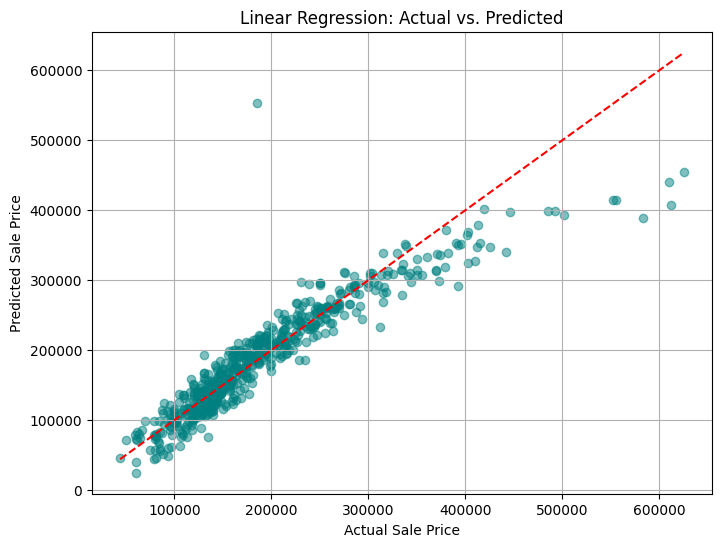

In [18]:
import matplotlib.pyplot as plt

plt.figure(figsize=(8, 6))
plt.scatter(y_test, y_pred, alpha=0.5, color='teal')
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r--')  # خط ایده‌آل
plt.xlabel("Actual Sale Price")
plt.ylabel("Predicted Sale Price")
plt.title("Linear Regression: Actual vs. Predicted")
plt.grid(True)
plt.show()

**Ridge Regression**

In [19]:
from sklearn.linear_model import Ridge

# Create and train the Ridge Regression model
ridge_model = Ridge(alpha=1.0)
ridge_model.fit(X_train, y_train)

# Predict
y_pred_ridge = ridge_model.predict(X_test)

# Evaluation
mse_ridge = mean_squared_error(y_test, y_pred_ridge)
rmse_ridge = np.sqrt(mse_ridge)
r2_ridge = r2_score(y_test, y_pred_ridge)

print("Ridge Regression Result:")
print(f"Mean Squared error (MSE): {mse_ridge:.2f}")
print(f"Root Mean Squared Error (RMSE): {rmse_ridge:.2f}")
print(f"R-squared Score (R²): {r2_ridge:.3f}")


Ridge Regression Result:
Mean Squared error (MSE): 1111412376.59
Root Mean Squared Error (RMSE): 33337.85
R-squared Score (R²): 0.861


**Lasso**

In [20]:
from sklearn.linear_model import Lasso

lasso_model = Lasso(alpha=1.0)
lasso_model.fit(X_train,y_train)

y_pred_lasso = lasso_model.predict(X_test)

mse_lasso = mean_squared_error(y_test,y_pred_lasso)
rmse_lasso = np.sqrt(mse_lasso)
r2_lasso = r2_score(y_test, y_pred_lasso)

print("Lasso Regression Results:")
print(f"Mean Squared Error (MSE): {mse_lasso:.2f}")
print(f"Root Mean Squared Error (RMSE): {rmse_lasso:.2f}")
print(f"R-squared Score (R²): {r2_lasso:.3f}")

Lasso Regression Results:
Mean Squared Error (MSE): 1111522898.75
Root Mean Squared Error (RMSE): 33339.51
R-squared Score (R²): 0.861


/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_coordinate_descent.py:631: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 5.463e+09, tolerance: 1.394e+09
  model = cd_fast.enet_coordinate_descent(


**Decision Tree Regressor**

In [21]:
from sklearn.tree import DecisionTreeRegressor


dt_model = DecisionTreeRegressor(max_depth=11,random_state=42)
dt_model.fit(X_train,y_train)

# Prediction
y_pred_dt = dt_model.predict(X_test)

# Error Calcutalted
mse_dt = mean_squared_error(y_test, y_pred_dt)
rmse_dt = np.sqrt(mse_dt)
r2_dt = r2_score(y_test, y_pred_dt)

print("Decison Tree Regression Result:")
print(f"Mean Squared Error(mse): {mse_dt:.2f}")
print(f"Root Mean Squared Error (rmse): {rmse_dt:.2f}")
print(f"R-squared Score (R²): {r2_dt:.3f}")

Decison Tree Regression Result:
Mean Squared Error(mse): 1457075401.99
Root Mean Squared Error (rmse): 38171.66
R-squared Score (R²): 0.818


**Random Forest**

In [22]:
from sklearn.ensemble import RandomForestRegressor

rf_model = RandomForestRegressor(n_estimators=100, random_state=42)
rf_model.fit(X_train, y_train)

y_pred_rf = rf_model.predict(X_test)

mse_rf = mean_squared_error(y_test, y_pred_rf)
rmse_rf = np.sqrt(mse_rf)
r2_rf = r2_score(y_test, y_pred_rf)

print("Random Forest Regression Results:")
print(f"Mean Squared Error (MSE): {mse_rf:.2f}")
print(f"Root Mean Squared Error (RMSE): {rmse_rf:.2f}")
print(f"R-squared Score (R²): {r2_rf:.3f}")

Random Forest Regression Results:
Mean Squared Error (MSE): 711241035.60
Root Mean Squared Error (RMSE): 26669.10
R-squared Score (R²): 0.911


In [23]:
from sklearn.ensemble import GradientBoostingRegressor

gb_model = GradientBoostingRegressor(n_estimators=200, learning_rate=0.1,max_depth=3, random_state=42)

gb_model.fit(X_train,y_train)

y_pred_gb = gb_model.predict(X_test)

mse_gb = mean_squared_error(y_test, y_pred_gb)
rmse_gb = np.sqrt(mse_gb)
r2_gb = r2_score(y_test, y_pred_gb)

print("Gradient Boosting Regression Results:")
print(f"Mean Squared Error (MSE): {mse_gb:.2f}")
print(f"Root Mean Squared Error (RMSE): {rmse_gb:.2f}")
print(f"R-squared Score (R²): {r2_gb:.3f}")

Gradient Boosting Regression Results:
Mean Squared Error (MSE): 634272821.17
Root Mean Squared Error (RMSE): 25184.77
R-squared Score (R²): 0.921


In [24]:
from lightgbm import LGBMRegressor



lgb_model = LGBMRegressor(
    n_estimators=500,
    learning_rate=0.05,
    max_depth=-1,
    num_leaves=31,
    subsample=0.8,
    colsample_bytree=0.8,
    random_state=42
)

lgb_model.fit(X_train, y_train)

y_pred_lgb = lgb_model.predict(X_test)

mse_lgb = mean_squared_error(y_test, y_pred_lgb)
rmse_lgb = np.sqrt(mse_lgb)
r2_lgb = r2_score(y_test, y_pred_lgb)

print("LightGBM Regression Results:")
print(f"Mean Squared Error (MSE): {mse_lgb:.2f}")
print(f"Root Mean Squared Error (RMSE): {rmse_lgb:.2f}")
print(f"R-squared Score (R²): {r2_lgb:.3f}")

[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.002291 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 4106
[LightGBM] [Info] Number of data points in the train set: 2344, number of used features: 70
[LightGBM] [Info] Start training from score 178582.207765
LightGBM Regression Results:
Mean Squared Error (MSE): 728416460.76
Root Mean Squared Error (RMSE): 26989.19
R-squared Score (R²): 0.909


**Cross Validation**

In [25]:
from sklearn.model_selection import cross_val_score, KFold
from sklearn.ensemble import GradientBoostingRegressor
import numpy as np

gbr = GradientBoostingRegressor(random_state=42)

kf = KFold(n_splits=5, shuffle=True, random_state=42)

cv_scores = cross_val_score(gbr, X, y, cv=kf, scoring='r2')
mse_scores = -cross_val_score(gbr, X, y, cv=kf, scoring='neg_mean_squared_error')

print("Cross-Validation R² Scores:", cv_scores)
print("Average R²:", np.mean(cv_scores))
print("Cross-Validation MSE Scores:", mse_scores)
print("Average MSE:", np.mean(mse_scores))


Cross-Validation R² Scores: [0.91930531 0.91874939 0.92586521 0.90765474 0.92118719]
Average R²: 0.9185523654834118
Cross-Validation MSE Scores: [6.46973576e+08 4.57528134e+08 4.87739900e+08 5.45139712e+08
 4.45886198e+08]
Average MSE: 516653504.2719325


In [26]:
from sklearn.model_selection import GridSearchCV

gbr = GradientBoostingRegressor(random_state=42)

param_grid = {
    'n_estimators':[100, 200, 300],
    'max_depth':[3, 5, 7],
    'learning_rate':[0.01, 0.1, 0.2],
    'subsample':[0.8, 1.0],
}

kf = KFold(n_splits=5, shuffle=True, random_state=42)

grid_search = GridSearchCV(
    estimator=gbr,
    param_grid=param_grid,
    scoring='r2',
    cv=kf,
    n_jobs=-1,
    verbose=2
)

grid_search.fit(X,y)

print("Best Parameters:", grid_search.best_params_)
print("Best R² Score:", grid_search.best_score_)

Fitting 5 folds for each of 54 candidates, totalling 270 fits
Best Parameters: {'learning_rate': 0.1, 'max_depth': 3, 'n_estimators': 300, 'subsample': 0.8}
Best R² Score: 0.9243897342970161


In [27]:
from xgboost import XGBRegressor


xgb = XGBRegressor(n_estimators=500, learning_rate=0.05, max_depth=6, subsample=0.8, colsample_bytree=0.8, random_state=42)
xgb.fit(X_train, y_train)

y_pred_xgb = xgb.predict(X_test)

mse_xgb = mean_squared_error(y_test, y_pred_xgb)
rmse_xgb = np.sqrt(mse_xgb)
r2_xgb = r2_score(y_test, y_pred_xgb)


print("XGBoost Results:")
print(f"Mean Squared Error (MSE): {mse_xgb:.2f}")
print(f"Root Mean Squared Error (RMSE): {rmse_xgb:.2f}")
print(f"R-squared Score (R²): {r2_xgb:.3f}")

XGBoost Results:
Mean Squared Error (MSE): 558384748.74
Root Mean Squared Error (RMSE): 23630.17
R-squared Score (R²): 0.930


In [28]:
from lightgbm import LGBMRegressor


lgbm = LGBMRegressor(n_estimators=500, learning_rate=0.05, max_depth=-1, random_state=42)
lgbm.fit(X_train, y_train)


y_pred_lgb = lgbm.predict(X_test)


mse_lgb = mean_squared_error(y_test, y_pred_lgb)
rmse_lgb = np.sqrt(mse_lgb)
r2_lgb = r2_score(y_test, y_pred_lgb)

print("LightGBM Results:")
print(f"Mean Squared Error (MSE): {mse_lgb:.2f}")
print(f"Root Mean Squared Error (RMSE): {rmse_lgb:.2f}")
print(f"R-squared Score (R²): {r2_lgb:.3f}")

[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.001132 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 4106
[LightGBM] [Info] Number of data points in the train set: 2344, number of used features: 70
[LightGBM] [Info] Start training from score 178582.207765
LightGBM Results:
Mean Squared Error (MSE): 768577705.52
Root Mean Squared Error (RMSE): 27723.23
R-squared Score (R²): 0.904


In [29]:
from sklearn.model_selection import cross_val_score, KFold
import numpy as np

xgb = XGBRegressor(
    n_estimators=500,
    learning_rate=0.05,
    max_depth=6,
    subsample=0.8,
    colsample_bytree=0.8,
    random_state=42
)

kf = KFold(n_splits=5, shuffle=True, random_state=42)


cv_r2 = cross_val_score(xgb, X, y, cv=kf, scoring='r2')


cv_mse = -cross_val_score(xgb, X, y, cv=kf, scoring='neg_mean_squared_error')

print("Cross-Validation R² Scores:", cv_r2)
print("Average R²:", np.mean(cv_r2))
print("Cross-Validation MSE Scores:", cv_mse)
print("Average MSE:", np.mean(cv_mse))


Cross-Validation R² Scores: [0.93293339 0.92087123 0.92609229 0.91330468 0.92747648]
Average R²: 0.9241356163882866
Cross-Validation MSE Scores: [5.37709726e+08 4.45579861e+08 4.86245905e+08 5.11786521e+08
 4.10304306e+08]
Average MSE: 478325263.8213972


In [30]:
from sklearn.model_selection import RandomizedSearchCV


param_dist = {
    'n_estimators': [200, 300, 400, 500, 600],
    'learning_rate': [0.01, 0.03, 0.05, 0.1, 0.2],
    'max_depth': [3, 4, 5, 6, 7, 8],
    'subsample': [0.6, 0.7, 0.8, 0.9, 1.0],
    'colsample_bytree': [0.6, 0.7, 0.8, 0.9, 1.0],
    'gamma': [0, 0.1, 0.2, 0.3, 0.4, 0.5]
}

random_search = RandomizedSearchCV(
    xgb,
    param_distributions=param_dist,
    n_iter=50,
    scoring='r2',
    cv=5,
    verbose=2,
    random_state=42,
    n_jobs=-1
)

random_search.fit(X, y)

print("Best Parameters:", random_search.best_params_)
print("Best R² Score:", random_search.best_score_)

Fitting 5 folds for each of 50 candidates, totalling 250 fits
[CV] END learning_rate=0.01, max_depth=3, n_estimators=100, subsample=0.8; total time=   2.0s
[CV] END learning_rate=0.01, max_depth=3, n_estimators=100, subsample=1.0; total time=   2.6s
[CV] END learning_rate=0.01, max_depth=3, n_estimators=200, subsample=0.8; total time=   3.9s
[CV] END learning_rate=0.01, max_depth=3, n_estimators=200, subsample=1.0; total time=   4.7s
[CV] END learning_rate=0.01, max_depth=3, n_estimators=200, subsample=1.0; total time=   4.6s
[CV] END learning_rate=0.01, max_depth=3, n_estimators=300, subsample=0.8; total time=   6.2s
[CV] END learning_rate=0.01, max_depth=3, n_estimators=300, subsample=1.0; total time=   7.0s
[CV] END learning_rate=0.01, max_depth=5, n_estimators=100, subsample=0.8; total time=   3.1s
[CV] END learning_rate=0.01, max_depth=5, n_estimators=100, subsample=0.8; total time=   3.1s
[CV] END learning_rate=0.01, max_depth=5, n_estimators=100, subsample=1.0; total time=   3.8

               Model           MSE      RMSE     R²
0  Linear Regression  1.111576e+09  33340.31  0.861
1              Ridge  1.111412e+09  33337.85  0.861
2              Lasso  1.111523e+09  33339.51  0.861
3      Decision Tree  1.159515e+09  34051.64  0.855
4  Gradient Boosting  6.342728e+08  25184.77  0.921
5            XGBoost  5.583847e+08  23630.17  0.930


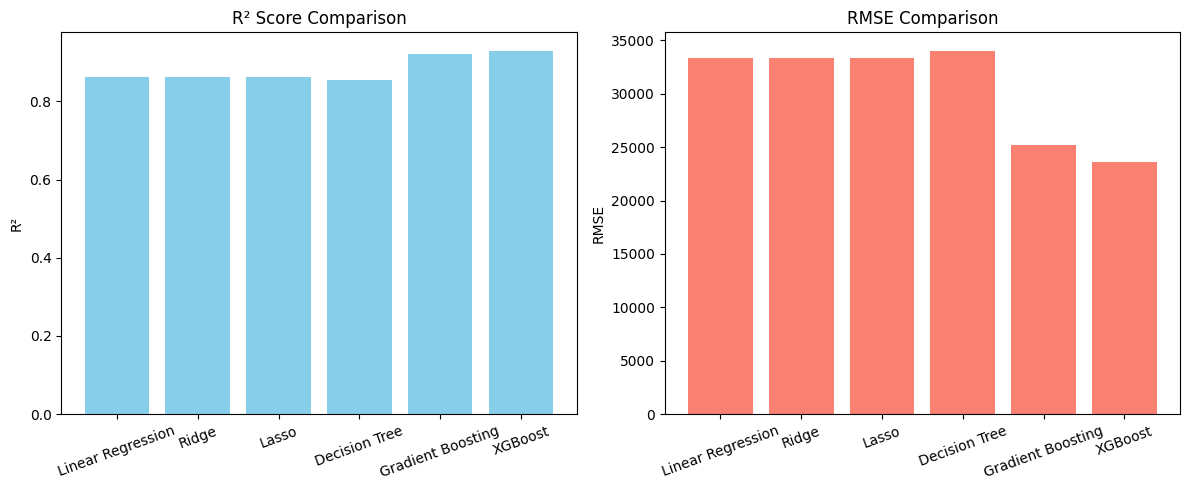

In [31]:
import matplotlib.pyplot as plt
import pandas as pd

results = {
    'Model': [
        'Linear Regression', 
        'Ridge', 
        'Lasso', 
        'Decision Tree', 
        'Gradient Boosting',
        'XGBoost'
    ],
    'MSE': [
        1111576341.48, 
        1111412376.59, 
        1111522898.75, 
        1159514502.17, 
        634272821.17,
        558384748.74
    ],
    'RMSE': [
        33340.31, 
        33337.85, 
        33339.51, 
        34051.64, 
        25184.77,
        23630.17
    ],
    'R²': [
        0.861, 
        0.861, 
        0.861, 
        0.855, 
        0.921,
        0.930
    ]
}

df_results = pd.DataFrame(results)
print(df_results)

plt.figure(figsize=(12, 5))

plt.subplot(1, 2, 1)
plt.bar(df_results['Model'], df_results['R²'], color='skyblue')
plt.title('R² Score Comparison')
plt.ylabel('R²')
plt.xticks(rotation=20)

plt.subplot(1, 2, 2)
plt.bar(df_results['Model'], df_results['RMSE'], color='salmon')
plt.title('RMSE Comparison')
plt.ylabel('RMSE')
plt.xticks(rotation=20)

plt.tight_layout()
plt.show()

